In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

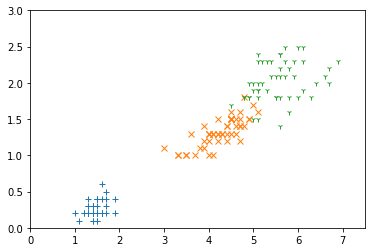

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:, 2:]
y = iris.target

def plot_data(x=x, y=y, axis=[0, 7.5, 0, 3]):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], '+')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'x')
    plt.plot(x[:, 0][y==2], x[:, 1][y==2], '1')
    plt.axis(axis)
    
plot_data()

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(x, y)

pred_prob = tree_clf.predict_proba([[5, 1.5]])
print("pred_prob = {}".format(pred_prob))
pred_value = tree_clf.predict([[5, 1.5]])
print("pred_value = {}".format(pred_value))

pred_prob = [[0.         0.90740741 0.09259259]]
pred_value = [1]


In [4]:
def plot_decision_boundary(clf, axis=[0, 7.5, 0, 3]):
    x1s = np.linspace(axis[0], axis[1], 100)
    x2s = np.linspace(axis[2], axis[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)

    cs = plt.contourf(x1, x2, y_pred, alpha=0.3)
    cbar = plt.colorbar(ticks=[0, 1, 2])

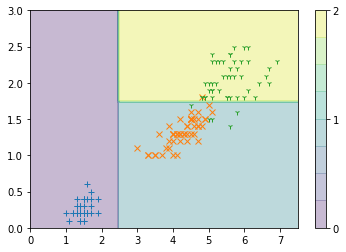

In [5]:
plt.figure()
plot_data()
plot_decision_boundary(tree_clf)
plt.show()

In [6]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
xr = x.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(xr, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

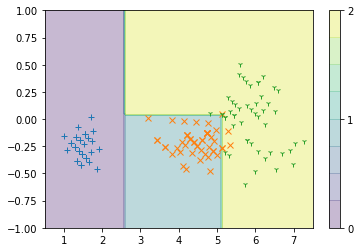

In [7]:
plt.figure()
plot_data(x=xr, axis=[0.5, 7.5, -1.0, 1])
plot_decision_boundary(tree_clf_r, axis=[0.5, 7.5, -1.0, 1])
plt.show()